In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Data Preparation
def prepare_data(num_points, y_function, plot=False):
    X = torch.linspace(-1, 1, num_points).reshape(-1, 1)
    if y_function == 'sinc':
        y = (np.sin(5 * (np.pi * X.numpy()))) / (5 * (np.pi * X.numpy()))
    elif y_function == 'sign':
        y = np.sign(np.sin(5 * np.pi * X.numpy()))
    y = torch.tensor(y, dtype=torch.float32)
    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(X.numpy(), y.numpy())
        plt.title(f'Function: {y_function.capitalize()}')
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)
        plt.show()
    return X, y

In [19]:
# Model Definition
class Model(nn.Module):
    def __init__(self, in_features=1, hidden_layers=[10], out_features=1):
        super().__init__()
        layers = [nn.Linear(in_features, hidden_layers[0])]
        layers += [nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)]
        layers.append(nn.Linear(hidden_layers[-1], out_features))
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
        x = self.layers[-1](x)
        return x


In [20]:
# Training Function
def train_model(X, y, model, epochs=2000, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses, y_pred

In [21]:
# Plotting Functions
def plot_losses(results, function_type):
    plt.figure(figsize=(10, 5))
    for name, losses in results.items():
        plt.plot(losses, label=name)
    plt.title(f'Model Losses for {function_type.capitalize()} Function')
    plt.legend()
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.show()

def plot_predictions(X_predictions, function_type):
    plt.figure(figsize=(10, 5))
    for name, data in X_predictions.items():
        X, y_pred = data
        plt.plot(X.numpy(), y_pred.detach().numpy(), label=name)
    plt.title(f'Model Predictions for {function_type.capitalize()} Function')
    plt.legend()
    plt.ylabel('y')
    plt.xlabel('x')
    plt.grid(True)
    plt.show()

In [22]:
# Initialize dictionaries for storing results and predictions
results_sinc, results_sign = {}, {}
X_predictions_sinc, X_predictions_sign = {}, {}

# Model configurations: (num_points, y_function, hidden_layers)
configs = [
    (200, 'sinc', [5, 10, 10, 10, 10, 10, 5]),
    (200, 'sinc', [10, 18, 15, 4]),
    (200, 'sinc', [190]),
    (150, 'sign', [5, 10, 10, 10, 10, 10, 5]),
    (150, 'sign', [10, 18, 15, 4]),
    (150, 'sign', [190])
]

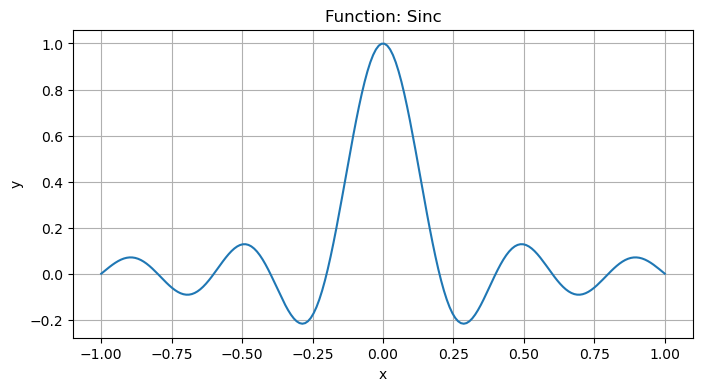

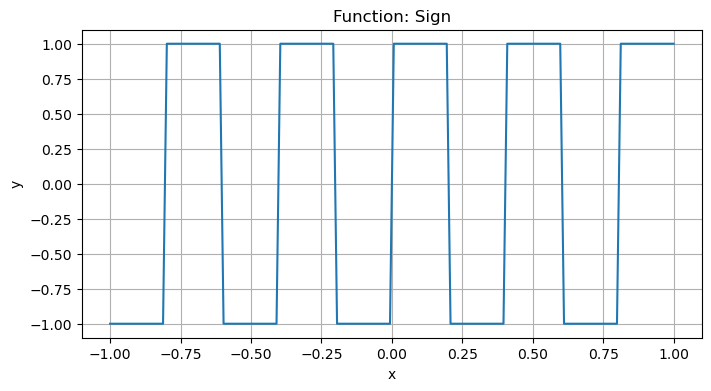

In [23]:
# Process each model configuration
for i, (num_points, y_function, hidden_layers) in enumerate(configs):
    X, y = prepare_data(num_points, y_function, plot=i==0 or i==3)  # Plot only the first of each type
    model = Model(hidden_layers=hidden_layers)
    losses, y_pred = train_model(X, y, model)
    if y_function == 'sinc':
        results_sinc[f'model{i}'] = losses
        X_predictions_sinc[f'model{i}'] = (X, y_pred)
    else:
        results_sign[f'model{i}'] = losses
        X_predictions_sign[f'model{i}'] = (X, y_pred)

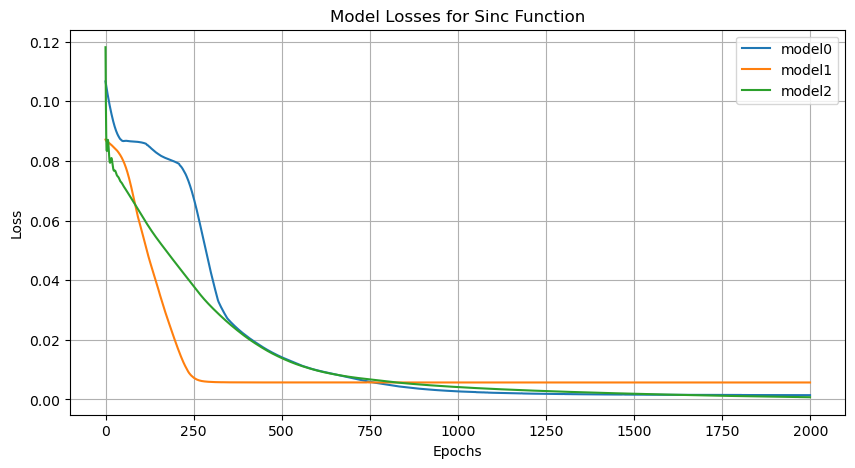

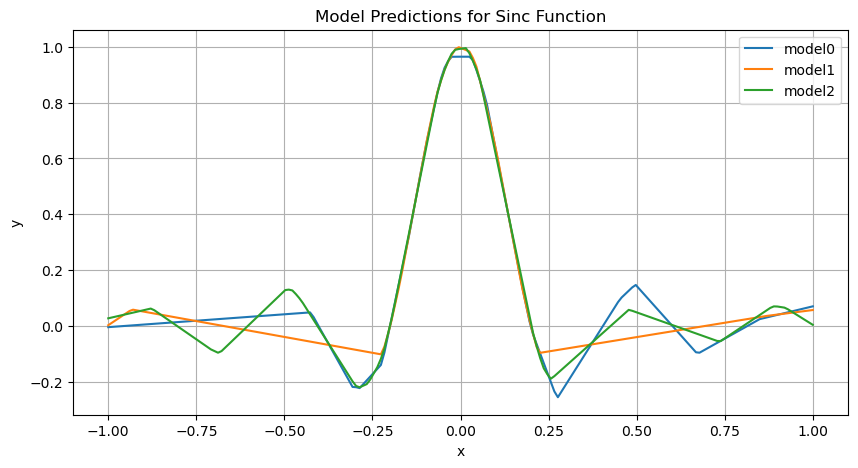

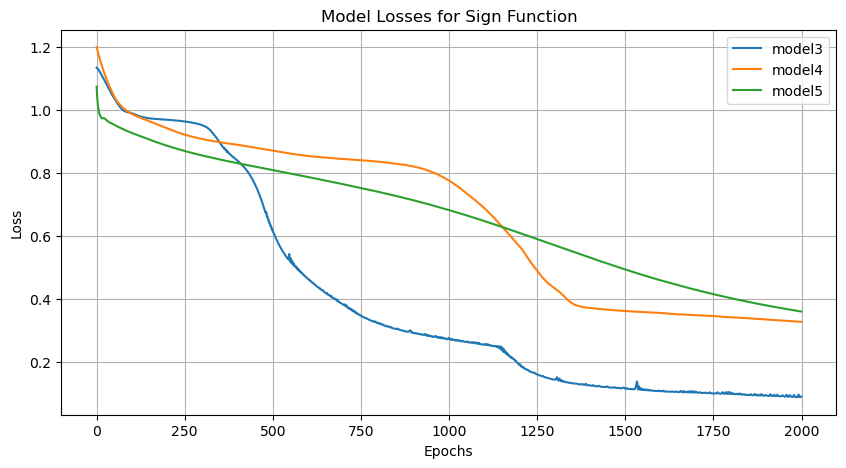

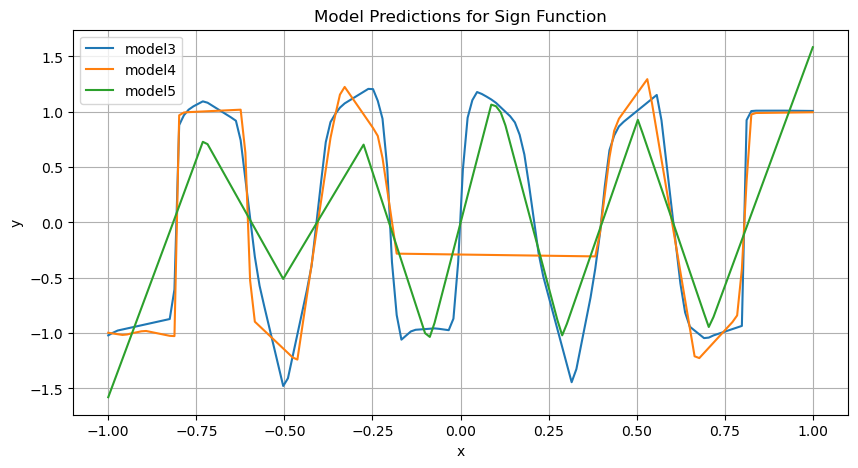

In [24]:
# Plotting
plot_losses(results_sinc, 'sinc')
plot_predictions(X_predictions_sinc, 'sinc')
plot_losses(results_sign, 'sign')
plot_predictions(X_predictions_sign, 'sign')